### Support Vector Machines Implementation

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from fetch_data import load_data, download_data
from svm_training import LinearSVM
from svm_loss import svm_loss

#### Load CIFAR-10 data

In [2]:
# Load the raw CIFAR-10 data.
X_train, y_train, X_test, y_test = load_data()

print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Training data shape:  (50000, 3072)
Training labels shape:  (50000,)
Test data shape:  (10000, 3072)
Test labels shape:  (10000,)


In [3]:
# Split into training set and validation set
num_training = 49000
num_validation = 1000
num_test = 1000
num_dev = 100

X_val = X_train[-num_validation:, :]
y_val = y_train[-num_validation:]

mask = np.random.choice(num_training, num_dev, replace=False)
X_dev = X_train[mask]
y_dev = y_train[mask]

X_train = X_train[:num_training, :]
y_train = y_train[:num_training]

X_test = X_test[:num_test, :]
y_test = y_test[:num_test]

print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)
print('Development data shape:', X_dev.shape)
print('Development data shape', y_dev.shape)

Train data shape:  (49000, 3072)
Train labels shape:  (49000,)
Validation data shape:  (1000, 3072)
Validation labels shape:  (1000,)
Test data shape:  (1000, 3072)
Test labels shape:  (1000,)
Development data shape: (100, 3072)
Development data shape (100,)


In [4]:
# Preprocessing: subtract the mean value across every dimension for training data
mean_image = np.mean(X_train, axis=0)

X_train = X_train.astype(np.float32) - mean_image.astype(np.float32)
X_val = X_val.astype(np.float32) - mean_image
X_test = X_test.astype(np.float32) - mean_image
X_dev = X_dev.astype(np.float32) - mean_image

# Append the bias dimension of ones (i.e. bias trick) so that our SVM
# only has to worry about optimizing a single weight matrix W.
X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
X_val = np.hstack([X_val, np.ones((X_val.shape[0], 1))])
X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))])
X_dev = np.hstack([X_dev, np.ones((X_dev.shape[0], 1))])

print(X_train.shape, X_val.shape, X_test.shape, X_dev.shape)

(49000, 3073) (1000, 3073) (1000, 3073) (100, 3073)


#### SVM Implementation

In [5]:
# Generate a random SVM weight matrix seeded with small numbers
np.random.seed(2321)
W = np.random.randn(3073, 10) * 0.0001 

# Calculate loss and gradient
loss, grad = svm_loss(W, X_dev, y_dev, 0.000005)

#### Training SVM with Stochastic Gradient Descent

In [6]:

# Linear SVM + SGD
classifier = LinearSVM()
reg = 1e-5 # regularization
lr = 1e-7 # learning rate
loss_hist_sgd = classifier.train(X=X_train, y=y_train, learning_rate=lr, reg=reg, num_iters=1500, optim='SGD', verbose=True)

# Write the LinearSVM.predict function and evaluate the performance on both the
# training set and validation set
y_train_pred = classifier.predict(X_train)
print('training accuracy: %f' % (np.mean(y_train == y_train_pred), ))
y_val_pred = classifier.predict(X_val)
print('validation accuracy: %f' % (np.mean(y_val == y_val_pred), ))

iteration 0 / 1500: loss 26.454440
iteration 100 / 1500: loss 10.709095
iteration 200 / 1500: loss 10.196136
iteration 300 / 1500: loss 8.376331
iteration 400 / 1500: loss 8.774273
iteration 500 / 1500: loss 6.285474
iteration 600 / 1500: loss 7.809516
iteration 700 / 1500: loss 7.097171
iteration 800 / 1500: loss 7.768745
iteration 900 / 1500: loss 7.601841
iteration 1000 / 1500: loss 7.017111
iteration 1100 / 1500: loss 5.678315
iteration 1200 / 1500: loss 7.378928
iteration 1300 / 1500: loss 7.312042
iteration 1400 / 1500: loss 6.708926
training accuracy: 0.306592
validation accuracy: 0.301000


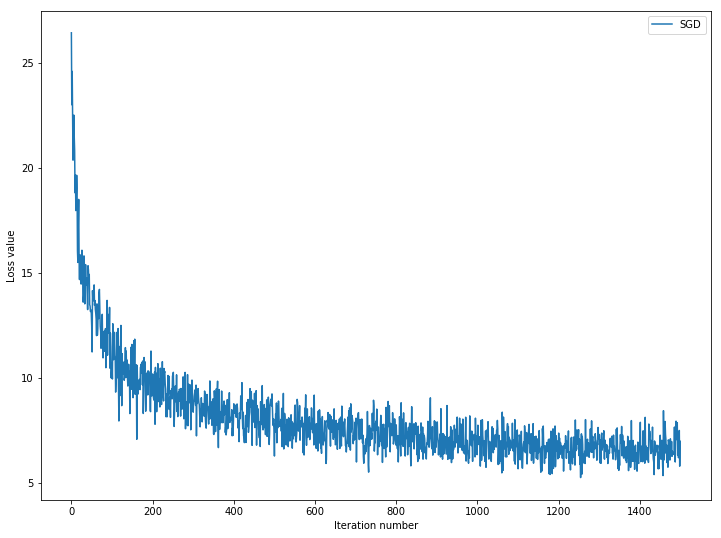

In [7]:
# SGD Error Plot (loss curve)
mpl.rcParams["figure.figsize"] = 12, 9
plt.plot(loss_hist_sgd, label='SGD')
plt.xlabel('Iteration number')
plt.ylabel('Loss value')
plt.legend()
plt.show()